### Classification: SVM Kernels

Suppose again we're given two classes and training data for each of the classes. As we've seen in the previous assignments, SVM and logistic regression find a _line_ that seperates them, so that when we see new samples we can classify them based on the line. Not all data is linearly seperable, however. Consider again the torus example in Fig. 1 from the previous homework's bonus problem: we can't seperate it with a straight line. 

<center>Fig. 1</center>
![alt](/images/notebooks_data/circle_class.png)

We can use something called a kernel function to push the data up to a higher dimension where _it is_ linearly seperable. In this homework we'll try putting a couple of kernel functions into practice, and see how parameter tuning effects our model. In machine learning, this is sometimes called the [kernel trick](https://en.wikipedia.org/wiki/Kernel_method). A kernel function can be thought of as a shortcut to a higher dimensional space given some data since it _only depends on the samples themselves_. We don't need to know anything explicit about higher order relationships, like when we specify a basis in the case of regression. A kernel function lets us implicitly see what the data would look like under a polynomial or Fourier basis.

In the video below we apply a polynomial kernel to the circular classification data. From the top down view, the data looks the same. The third dimension shows the data projected onto a quadratic curve (the purple surface). Note as the video frame rotates the data is clearly linearly seperable (the flat green surface; a flat surface qualifies as "linearly seperable"). **The line of intersection between the green linear surface and the purple quadratic surface the data has been projected onto can be thought of as the decision boundary.** (The MP4 may take a moment to load into the notebook, but can otherwise be viewed in the figs directory or on the web version)

In [17]:
%%HTML
<video width="640" height="480" align="center" controls>
  <source src="figs/polykernel.mp4" type="video/mp4">
</video>

The intersection of the planes forms a line that cuts directly through the data. Fig. 2 shows the line: new samples that fall inside the circle are labeled class 2, samples that fall outside are labeled class 1. This is an example of a polynomial kernel being used to seperate the data. We'll walk through coding example on the same data below.

<center>Fig. 2</center>
![alt](/images/notebooks_data/circle_class_boundary.png)

In [1]:
#we'll look at the solution to the bonus problem from last week line by line
#be sure to use other code like the precision and recall from the previous homework solutions

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

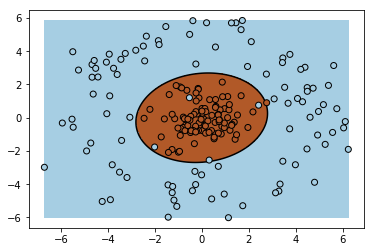

In [18]:
data = np.loadtxt("homework_6_bonus.txt")  #load the data
X_b = data[:,0:2]    #coordinates of the data
Y_b = data[:,2]      #0 or 1 label for each row sample

#in homework_6_solutions.ipynb we explicity break apart the data for plotting
#in this example we'll use more builtin matplotlib plotting tools

svm_model_obj = SVC(kernel='poly', degree=2)    #the kernel here is "poly", can be "linear" or "rbf"
svm_model_obj.fit(X_b, Y_b)  #fit the model

#this block can be used for plotting in each question
plt.figure()
plt.clf()

#make sure that you update what X_b is here in the following problems
plt.scatter(X_b[:, 0], X_b[:, 1], c=Y_b, cmap=plt.cm.Paired, edgecolor='k', zorder=10)               
                                            #the c argument is "color", Y_b is binary 0 or 1 for
                                            #each row sample so it automatically chooses a color
                                            #edgecolor='k' sets the edges of the points to black
                                            #zorder sets foreground-background information for the points
                                            #to be in front of the shaded background

#make sure you update what X_b is here in the following problems
plt.axis('tight')       #this shrinks the plot down the relevant coordinate range
x_min = X_b[:, 0].min() #we need to find the minimum and maximum of each axis so we can plot the decision boundary
x_max = X_b[:, 0].max()
y_min = X_b[:, 1].min()
y_max = X_b[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
#note that we're getting the decision function below from the svm_model_obj declared and trained above
Z = svm_model_obj.decision_function(np.c_[XX.ravel(), YY.ravel()])  #get the decision boundary from the x and y values
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)  #this shades the model's class 1 and class 2 regions

plt.contour(XX, YY, Z, colors=['k'], linestyles=['-'], levels=[0]) #this plots the decision boundary

plt.show()

### Problem 1

Use the provided data set to train and test an SVM classifier with a polynomial kernel. Report the training and testing precision and recall and plot the decision boundary for just the test data. Set the degree hyperparameter to 2.

In [9]:
data_train = np.loadtxt("homework_7_data_train.txt")
X_train = data_train[:,0:2]    
Y_train = data_train[:,2]

data_test = np.loadtxt("homework_7_data_test.txt")
X_test = data_test[:,0:2]    
Y_test = data_test[:,2]

In [10]:
#insert your code here

svm_model_obj = SVC(kernel='poly', degree=2) 

### Problem 2a

Use the same data set from problem 1, train and test an SVM classifier with an RBF kernel and setting the gamma hyperparameter to 'auto'. Report the training and testing precision and recall. We'll plot the decision boundary in the next problem.

In [11]:
#insert your code here

svm_model_obj = SVC(kernel='rbf', gamma='auto') 

### Problem 2b

In real engineering applications we don't have access to _live_ test data; this would be the data that a learning algorithm is confronted with once an algorithm is deployed. One technique used to find the best hyperparameters is called validation, and performed with a held-out [_validation_ data set](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets) that you do not train with, but tune hyperparameters with. For an RBF kernel, the larger the gamma the more sensitive to false positives.

First, re-do problem 2a and set gamma equal to float values 10.0, 1.0, 0.1, and 0.01. For each of the four values of gamma, plot the decision boundary.

In [12]:
#insert your code here

### Problem 2c

For each model learned cooresponding to each value of gamma in problem 2b, report the _validation_ and _test_ precision and recall. Which value of gamma achieves the best F1 score on _validation_ data? On _test_ data? Recall that the F1 score is the harmonic mean of the precision and recall:

$F_1 = 2\cdot \frac{\text{precision}\cdot\text{recall}}{\text{precision}+\text{recall}}$

In [15]:
data_val = np.loadtxt("homework_7_data_validation.txt")
X_val = data_val[:,0:2]    
Y_val = data_val[:,2]

In [16]:
#insert your code here

### Bonus

In problem 1, you were given the polynomial degree hyperparameter to be equal to 2. The performance drops considerably when the degree is set to 3, but performs well when the degree is equal to 4. In general odd degree will perform poorly. Make a guess as to what the shape of the basis function that generated the class of each data point looks like. (Hint: the decision boundary is a _conic section_.)